In [1]:
import pickle
from pathlib import Path

import lanfactory
import sbibm
import torch

from sbi.inference import MCMCPosterior, MNLE
from sbi.inference.potentials.base_potential import BasePotential
from sbi.utils import mcmc_transform
from sbi.analysis import pairplot


2022-04-26 07:02:11.823589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64
2022-04-26 07:02:11.823618: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Get benchmark task to load observations
seed = torch.randint(100000, (1,)).item()

task = sbibm.get_task("ddm")
prior = task.get_prior_dist()
simulator = task.get_simulator(seed=seed) # Passing the seed to Julia.

In [3]:
# Observation indices >200 hold 100-trial observations
num_obs = 100
xos = torch.stack([task.get_observation(200 + ii) for ii in range(1, 1+num_obs)]).squeeze()

# encode xos as (time, choice)
xos_2d = torch.zeros((xos.shape[0], xos.shape[1], 2))
for idx, xo in enumerate(xos):
    xos_2d[idx, :, 0] = abs(xo)
    xos_2d[idx, xo > 0, 1] = 1

In [4]:
BASE_DIR = Path.cwd().parent.parent
save_folder = BASE_DIR / "data/results"

In [8]:
with open("lan_10_11_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples1 = torch.stack(samples)

with open(save_folder / "lan_10_5_ours_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples2 = torch.stack(samples)

with open(save_folder / "lan_10_6_ours_posterior_samples_100x100iid.p", "rb") as fh:
    samples = pickle.load(fh)
samples3 = torch.stack(samples)




/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/janfb/qode/sbi/sbi/analysis/plot.py:425: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],


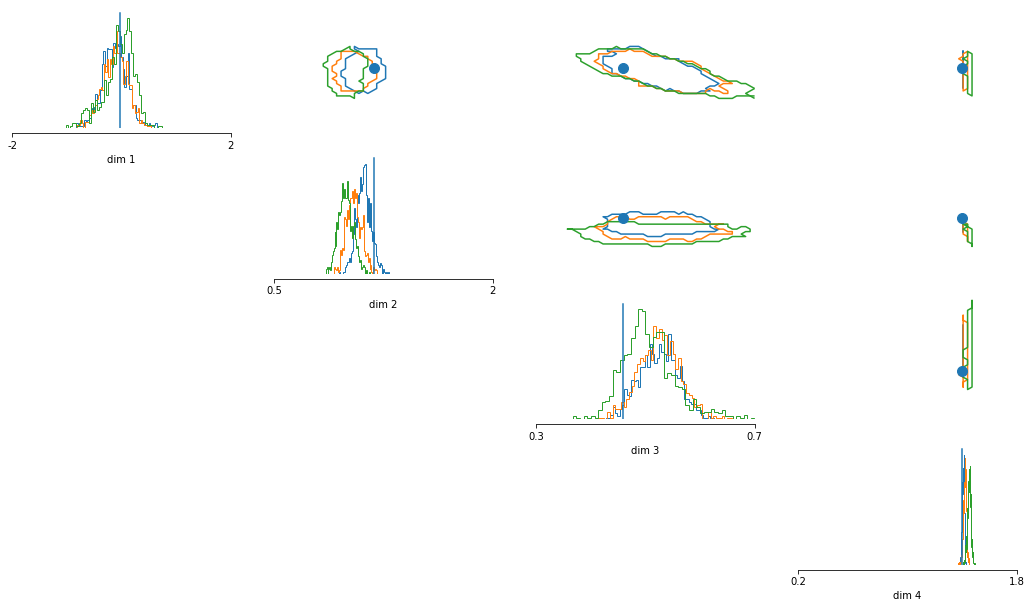

In [11]:
# Reference posterior for first obs in xos
obsi = 18
reference_samples = task.get_reference_posterior_samples(201+obsi)
true_theta = task.get_true_parameters(201+obsi)

fig, ax = pairplot(
    [
        reference_samples[:1000], 
        samples1[obsi,], 
        # samples2[obsi,],
        samples3[obsi,], 
    ], 
    upper="contour", points=true_theta, figsize=(18, 10),
    contour_offdiag = dict(levels=[0.99]),
    limits=[[-2, 2], [0.5, 2.0], [.3, .7], [.2, 1.8]], 
    ticks = [[-2, 2], [0.5, 2.0], [.3, .7], [.2, 1.8]], 
);